In [1]:
%run ../src/__init__.py

In [2]:
%run ../src/load_data.py

/home/jovyan/dsi-plus-2/Capstone/load_data.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/cor

In [5]:
dodgers_df= final_drop[final_drop['team'] == 'LAD'].sort_values('date',axis=0)

In [7]:
dodgers_df = team_data_clean(dodgers_df)

/home/jovyan/dsi-plus-2/Capstone/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [8]:
dodgers_df = add_rival('LAD', dodgers_df)

In [10]:
new_data=pd.read_pickle('../data/test_data_mlb.pkl')

In [11]:
dodgers_new = new_data[new_data['team'] == 'LAD'].sort_values('date',axis=0)

In [12]:
dodgers_new = test_data_clean(dodgers_new)

/home/jovyan/dsi-plus-2/Capstone/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [13]:
dodgers_new = add_rival('LAD', dodgers_new)

In [14]:
dodgers_new = pd.concat([dodgers_df, dodgers_new],axis=0)

In [15]:
dodgers_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 28648 to 1133
Data columns (total 70 columns):
attendance         2233 non-null int64
date               2233 non-null datetime64[ns]
div_rank           2233 non-null int64
double_header      2233 non-null float64
gb                 2233 non-null float64
opening_day        2233 non-null float64
opponent           2233 non-null object
record             2233 non-null float64
runs_allowed_ma    2233 non-null float64
runs_ma            2233 non-null float64
runs_pg            2233 non-null float64
streak             2233 non-null int64
team               2233 non-null object
1990               2233 non-null int64
1991               2233 non-null int64
1992               2233 non-null int64
1993               2233 non-null int64
1994               2233 non-null int64
1995               2233 non-null int64
1996               2233 non-null int64
1997               2233 non-null int64
1998               2233 non-null int64
1999  

,count,mean,std,min,25%,50%,75%,max,skew
runs,2233.0,4.162562,2.814612,0.0,2.000000,4.000000,6.000000,17.0,0.832855
runs_allowed,2233.0,3.760860,2.752996,0.0,2.000000,3.000000,5.000000,19.0,0.945201
innings,2233.0,9.178236,0.779745,0.0,9.000000,9.000000,9.000000,18.0,2.899755
record,2233.0,0.532157,0.095871,0.0,0.496296,0.530303,0.568627,1.0,-0.602723
div_rank,2233.0,2.352441,1.316022,0.0,1.000000,2.000000,3.000000,7.0,0.840726
gb,2233.0,-3.134572,6.593714,-31.5,-6.500000,-2.500000,0.500000,21.0,-0.650293
time,2233.0,177.907300,27.752392,0.0,159.000000,175.000000,192.000000,334.0,0.944534
attendance,2233.0,41617.982983,8435.060187,17377.0,35249.000000,42423.000000,48110.000000,57099.0,-0.264854
runs_pg,2233.0,4.332296,0.751318,0.0,4.058824,4.322034,4.735294,10.0,-0.959184
runs_ma,2233.0,4.165883,1.335850,0.8,3.200000,4.000000,5.000000,14.0,0.631321


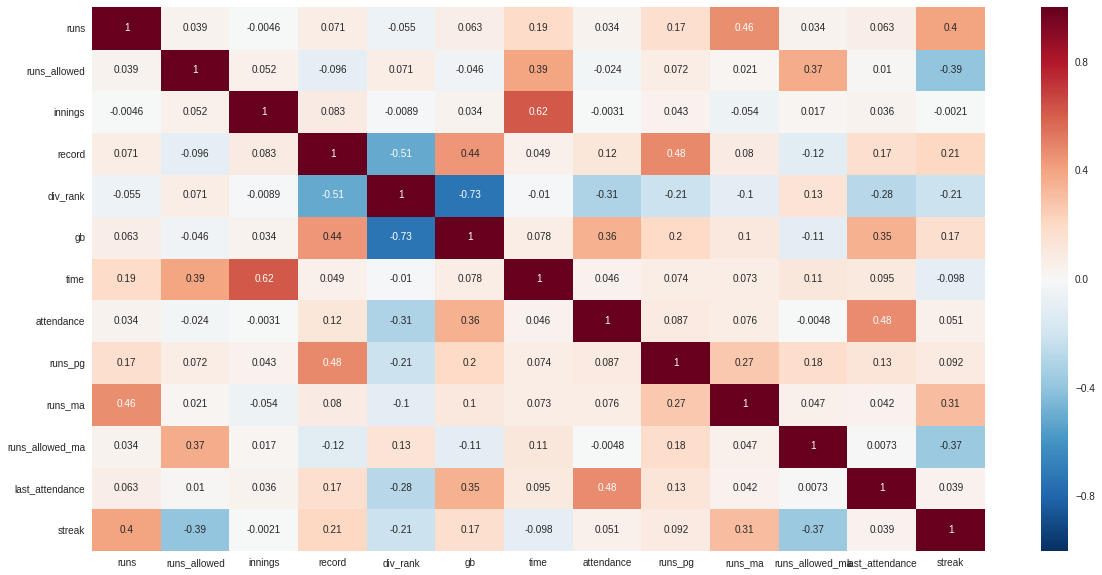

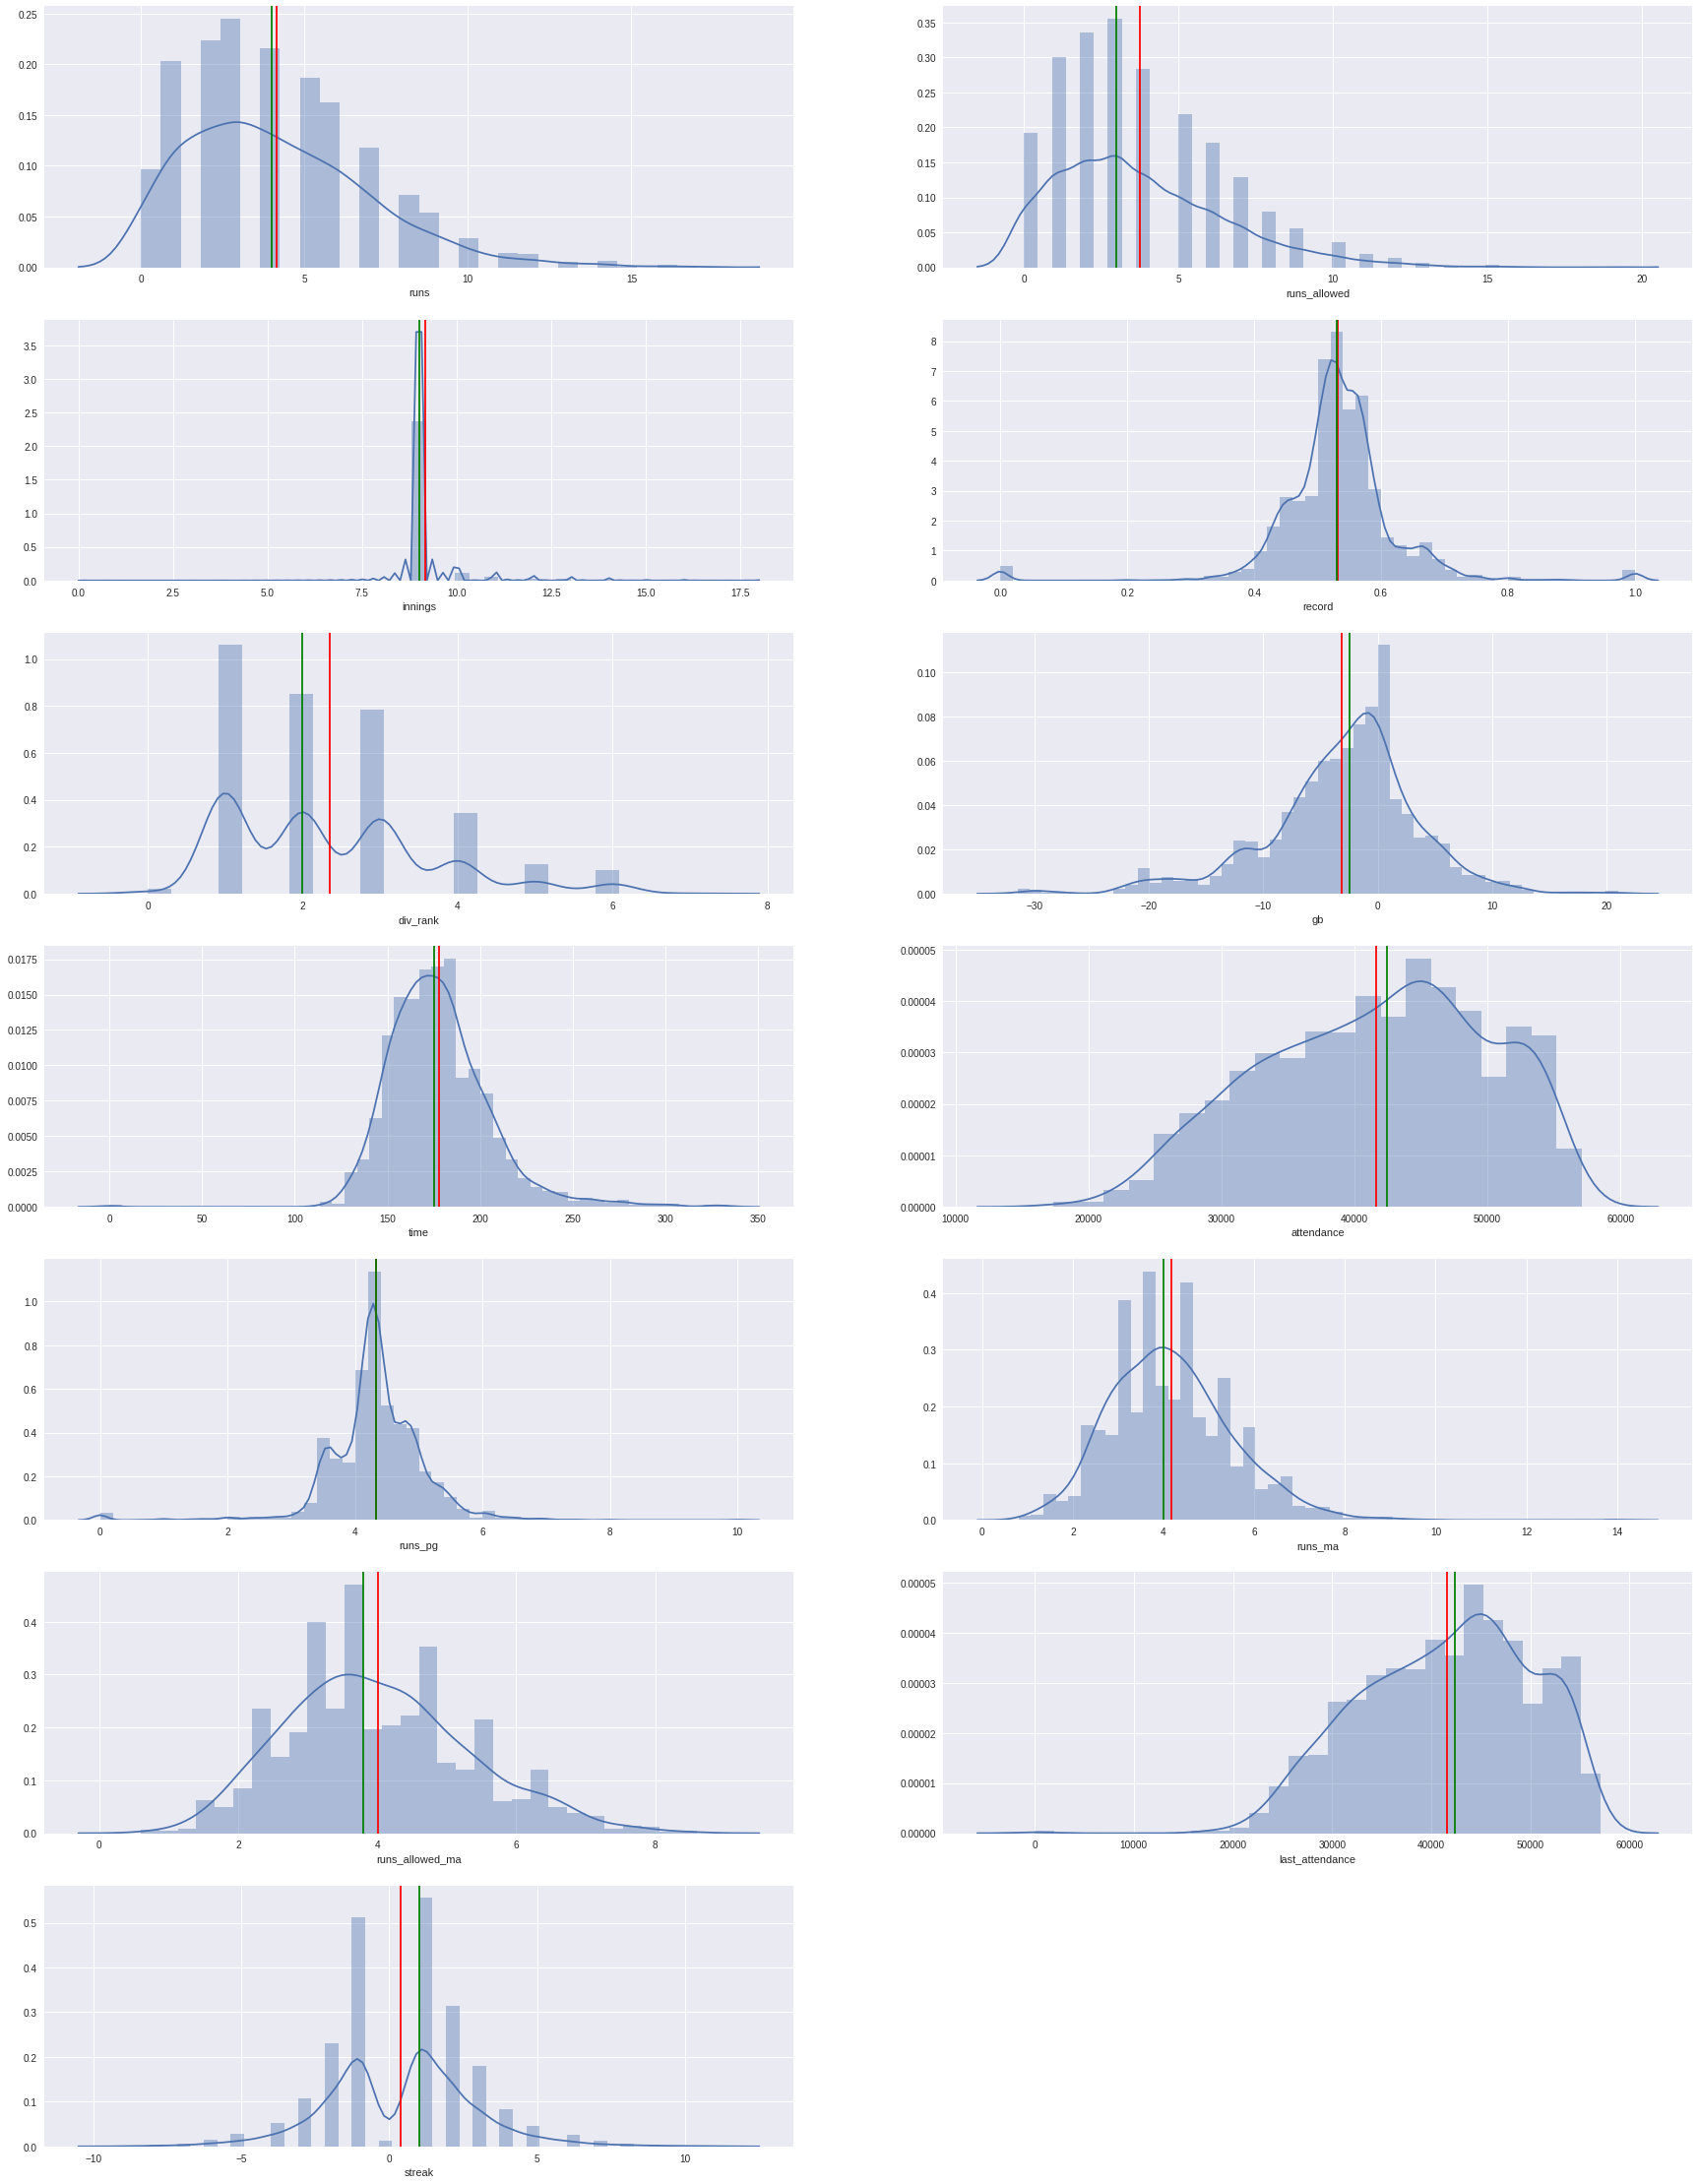

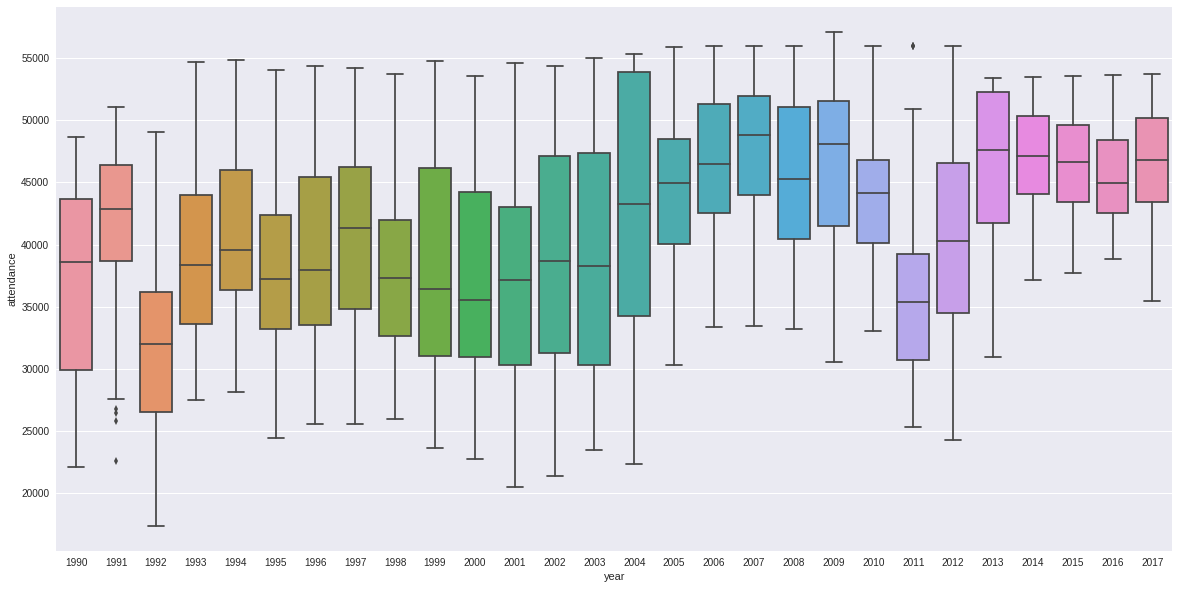

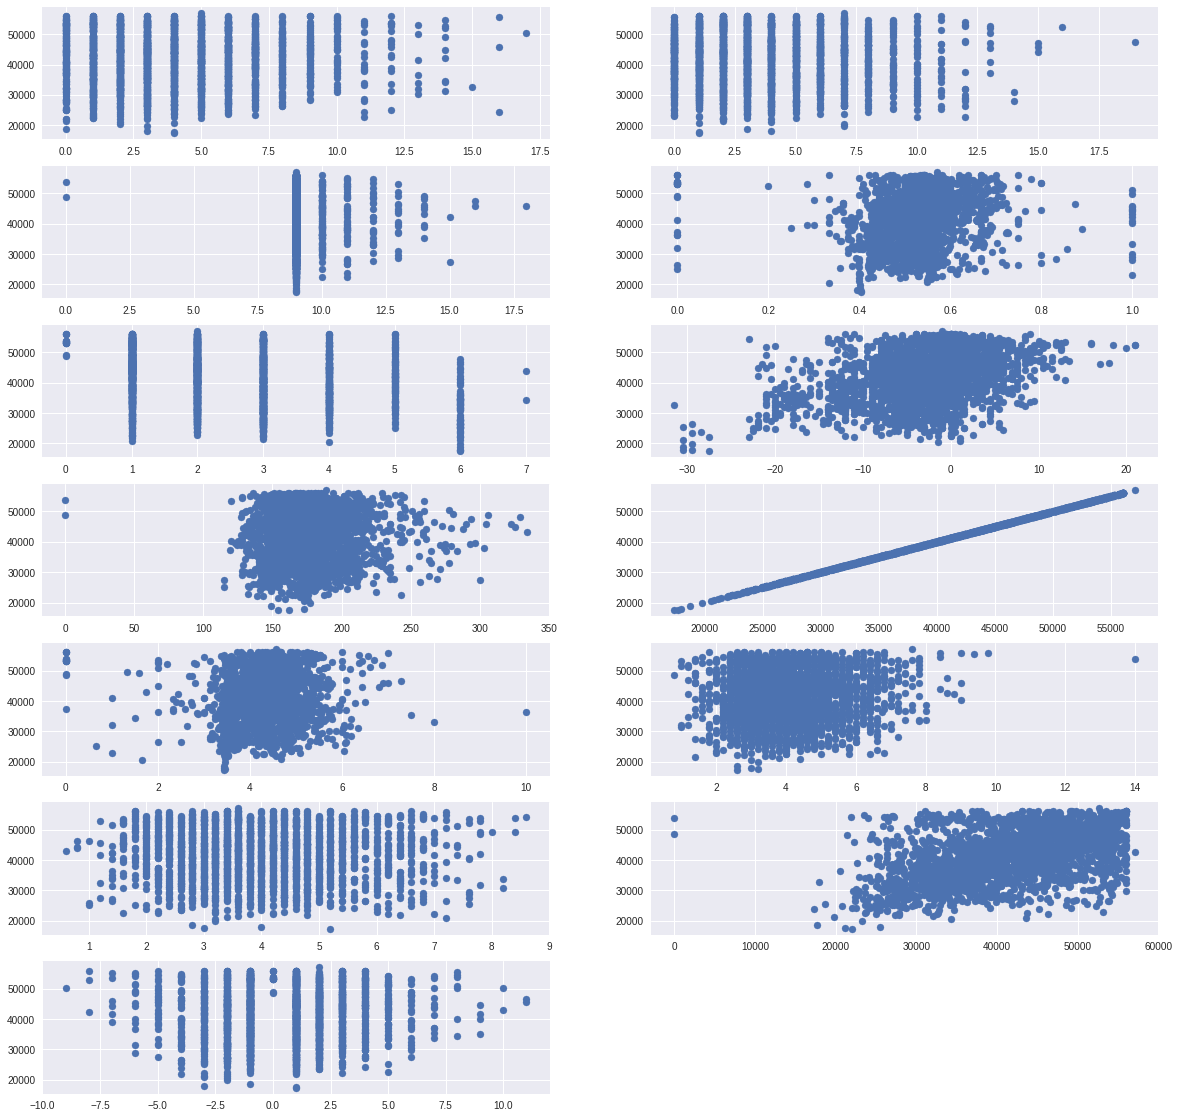

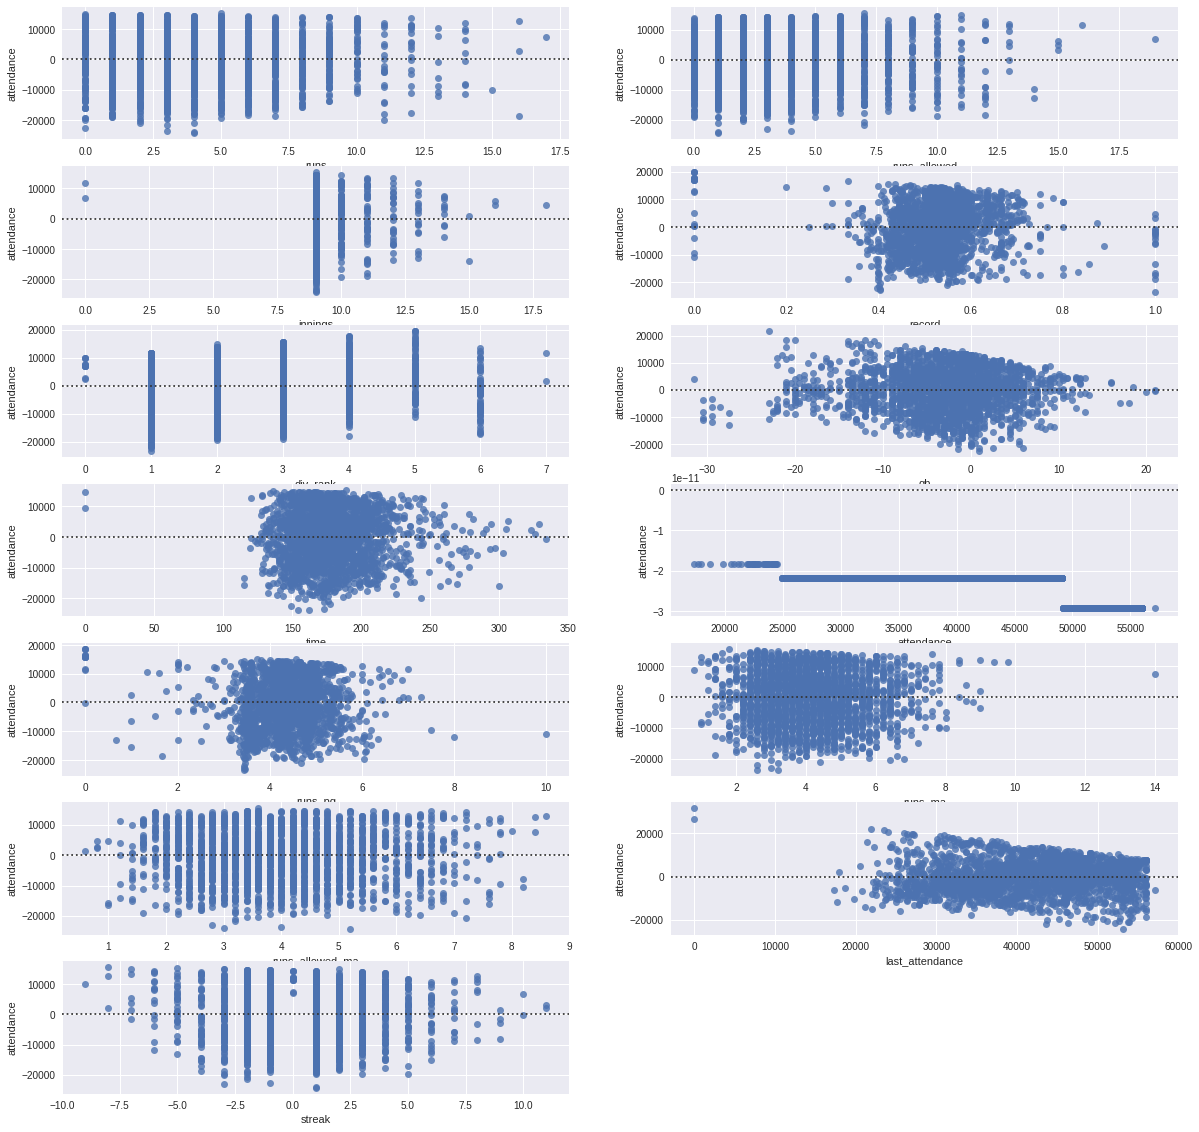

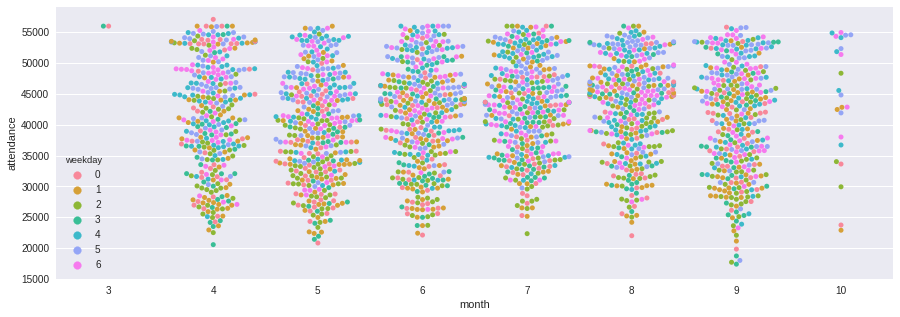

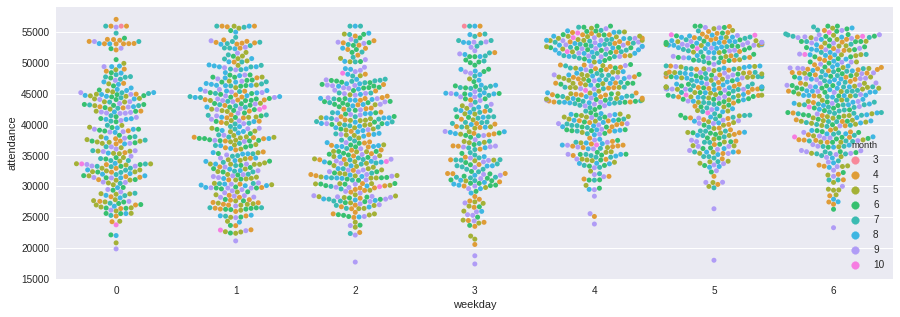

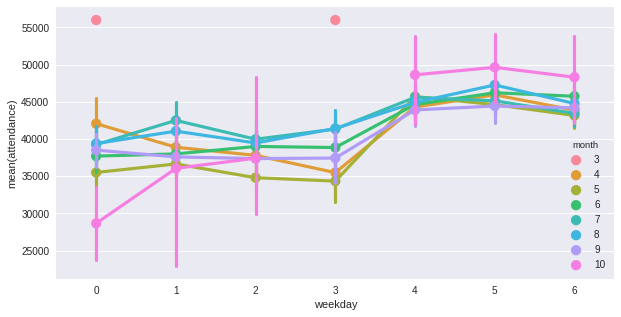

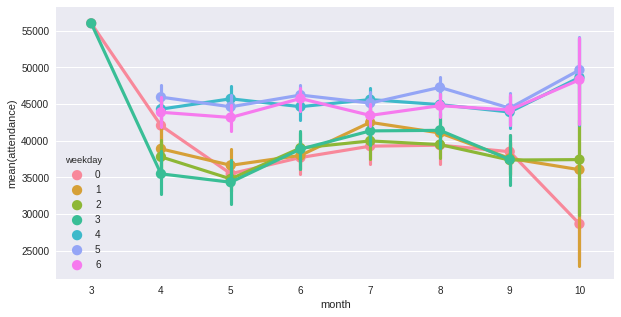

In [16]:
eda(dodgers_new)

In [17]:
annual_mean_r2(dodgers_new)

0.24002020416591019

In [19]:
dodgers_data, feature, target = model_fit_ready(dodgers_new)

In [20]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.885728,0.395278
Decision_tree_r2,1.000000,-0.031550
Random_forest_r2,0.889033,0.393928
Gradient_boost_r2,0.604074,0.450968


In [21]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [22]:
scale_fit = model_fit_score(feature_sca, target) 
scale_fit.columns =['scaled_train', 'scaled_test']
scale_fit

,scaled_train,scaled_test
Bagging_r2,0.879931,0.407200
Decision_tree_r2,1.000000,0.021330
Random_forest_r2,0.878812,0.382637
Gradient_boost_r2,0.604074,0.450763


In [23]:
score_table = pd.concat([bt, scale_fit],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='random'))))
Feature top 10 ranking:
1. last_attendance (0.334594)
2. gb (0.131202)
3. F (0.119868)
4. SA (0.063840)
5. opening_day (0.052777)
6. 1992 (0.048649)
7. S (0.043792)
8. div_rank (0.025764)
9. 2012 (0.021905)
10. 1995 (0.015457)


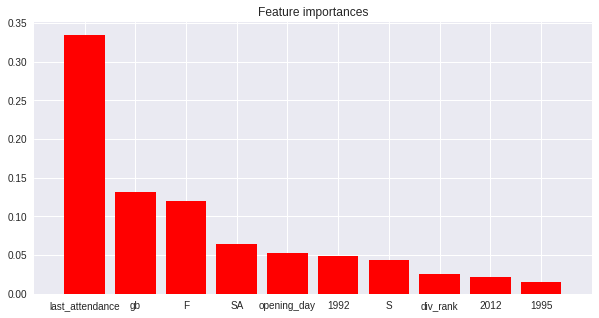

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=18, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.440094)
2. gb (0.094252)
3. F (0.087413)
4. runs_pg (0.068688)
5. record (0.051513)
6. SA (0.028349)
7. M (0.026000)
8. time (0.025241)
9. runs_ma (0.023437)
10. runs_allowed_ma (0.022424)


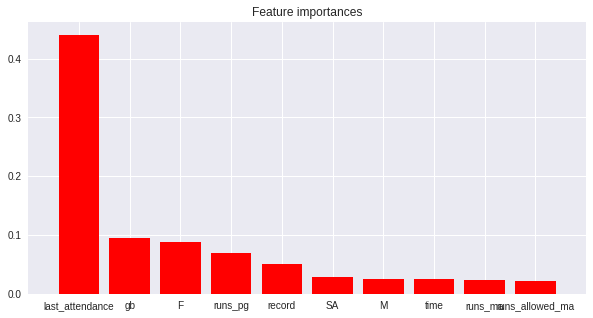

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_sp...s=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.092561)
2. record (0.065613)
3. gb (0.062777)
4. runs_pg (0.060369)
5. F (0.038837)
6. SA (0.035313)
7. opening_day (0.034758)
8. streak (0.034499)
9. runs_allowed_ma (0.034343)
10. time (0.033092)


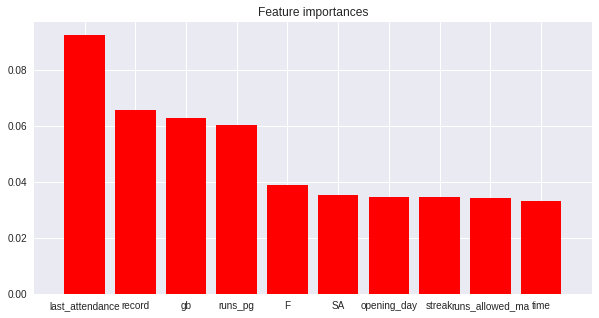

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0,
         max_samples=0.80000000000000004, n_estimators=23, n_jobs=-1,
         oob_score=False, random_state=None, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.298315)
2. double_header (0.077048)
3. gb (0.075213)
4. opening_day (0.051101)
5. record (0.049857)
6. runs_allowed_ma (0.044598)
7. runs_ma (0.040117)
8. runs_pg (0.037549)
9. streak (0.027341)
10. 1990 (0.025969)


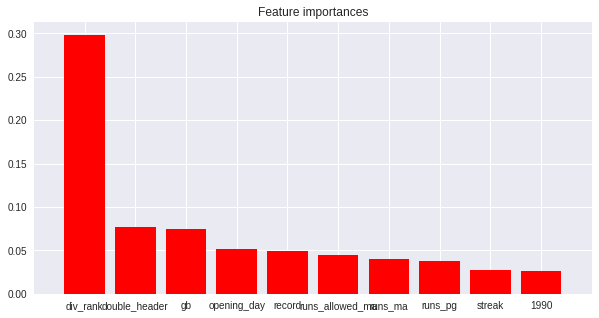

,train_score,test_score,scaled_train,scaled_test,P&O_train_score,P&O_test_score
Bagging_r2,0.885728,0.395278,0.879931,0.407200,0.862804,0.426239
Decision_tree_r2,1.000000,-0.031550,1.000000,0.021330,0.485582,0.341033
Random_forest_r2,0.889033,0.393928,0.878812,0.382637,0.594742,0.406602
Gradient_boost_r2,0.604074,0.450968,0.604074,0.450763,0.637075,0.472720


In [29]:
grid_score(feature, target, score_table)

In [24]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [25]:
vif.sort_values('VIF Factor',axis=0,ascending=False)[-16:-1]

,VIF Factor,features
0,4.335873,div_rank
2,3.959900,gb
7,3.126494,runs_pg
58,2.707522,time
4,2.534513,record
8,2.474756,streak
56,2.459142,runs_allowed
55,2.347853,runs
57,2.234431,innings
54,1.741312,last_attendance


In [26]:
vif_feature = feature_sca.drop(['div_rank','gb'],axis=1)

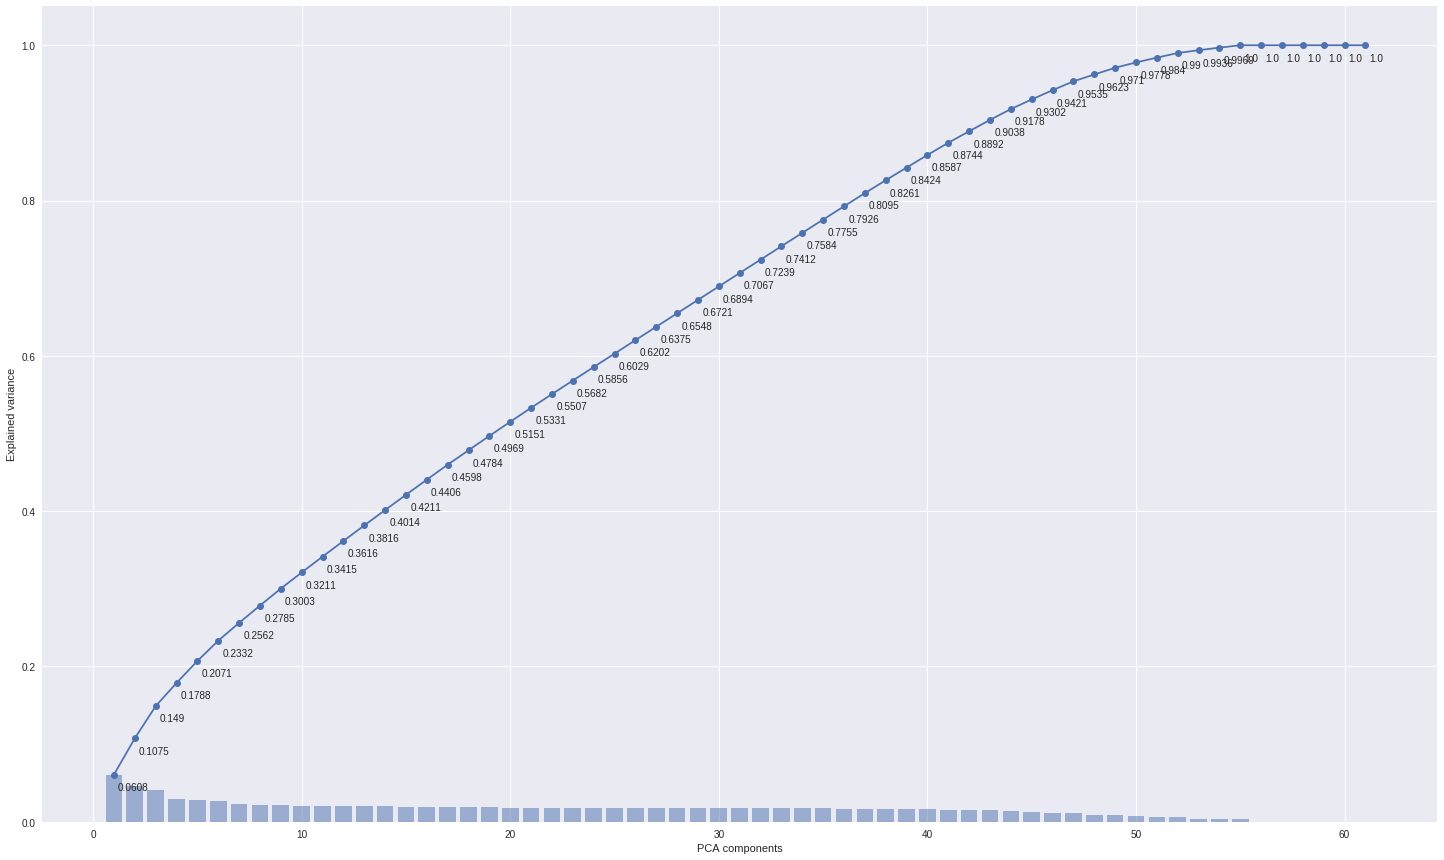

In [28]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vif_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,62)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [30]:
non_para_model_fit(vif_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.009518,0.008949
Support Vector Machine,0.496577,0.444262


In [31]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


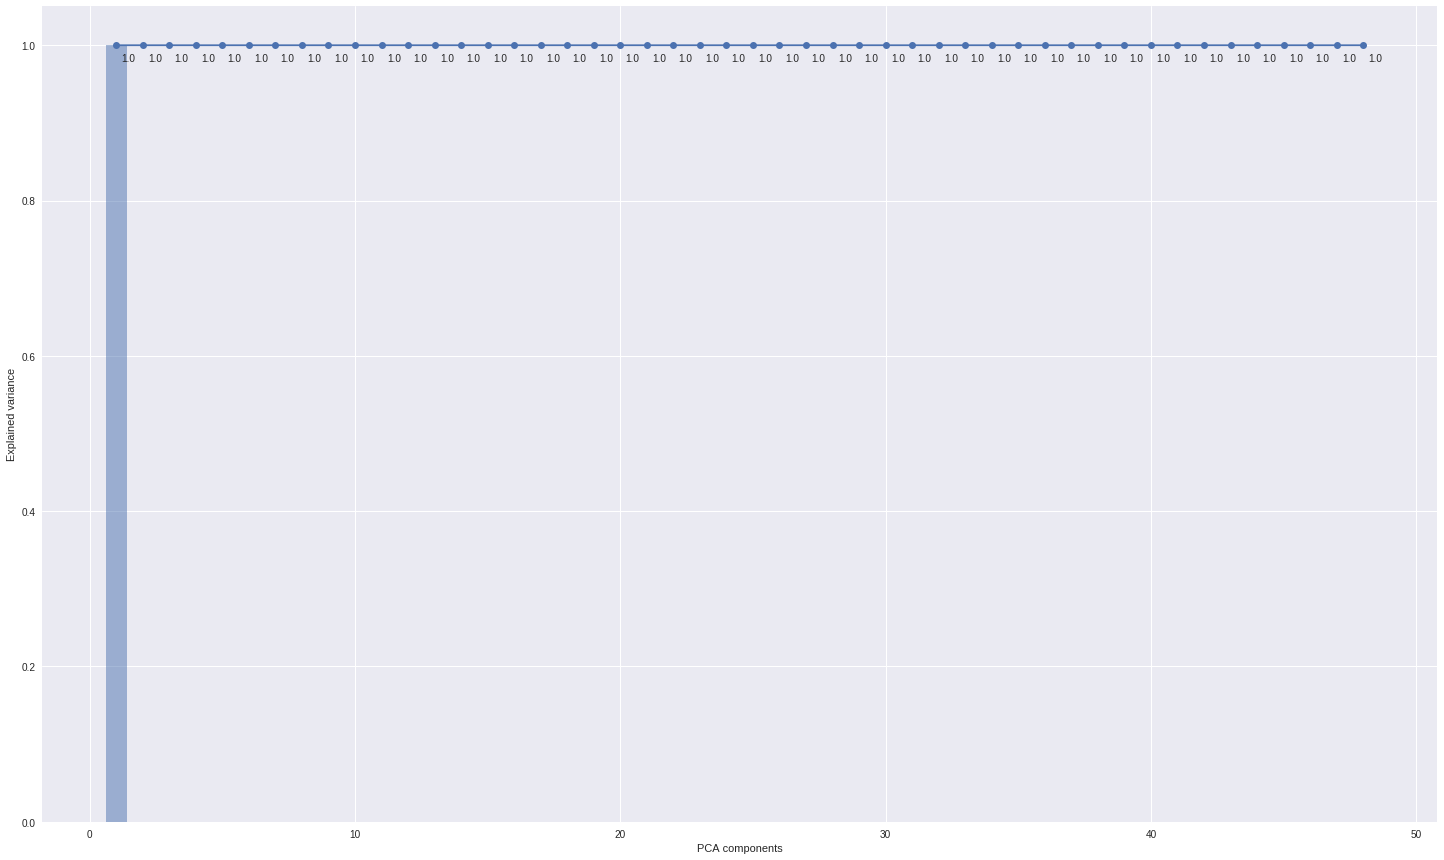

In [33]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,49)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [34]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.009518,0.008949
Support Vector Machine,0.497294,0.451737
